In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [97]:
df = pd.read_csv('Datasets/diabetes.csv')

In [100]:
data = df.values
print(data.shape)

(768, 9)


In [104]:
X = data[: , :-1]
Y = data[:, -1]

print(X.shape, Y.shape)

(768, 8) (768,)


In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [107]:
freq = np.unique(Y_train, return_counts=True)
print(freq)

(array([0., 1.]), array([405, 209], dtype=int64))


<AxesSubplot: >

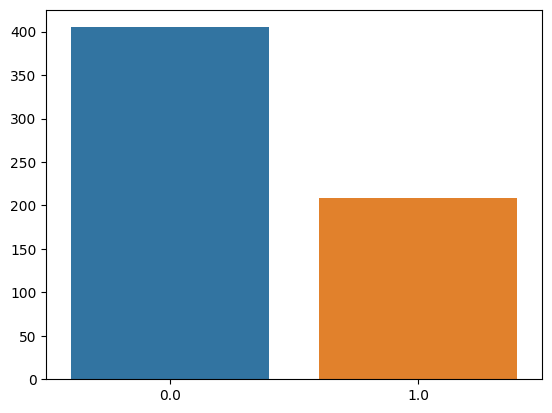

In [108]:
sns.barplot(x=freq[0], y=freq[1])

In [109]:
def dist(x1, x2):
    return np.sqrt(sum((x1 - x2) ** 2))

def knn(X, Y, queryX, k = 5):
    vals = []

    for i in range(X.shape[0]):
        d = dist(queryX, X[i])
        vals.append((d, Y[i]))
    
    vals = sorted(vals, key= lambda x : x[0])

    vals = vals[:k]

    vals = np.array(vals)

    new_vals = np.unique(vals[:, 1], return_counts=True)

    index = new_vals[1].argmax()
    pred = new_vals[0][index]

    return pred

# def dist(x1, x2):
#     return np.sqrt(sum((x1 - x2) ** 2))

# def knn(X, Y, queryPoint, k = 5):
#     vals = []
#     m = X.shape[0]

#     for i in range(m):
#         d = dist(X[i], queryPoint)
#         vals.append((d, Y[i]))
    
#     vals = sorted(vals, key= lambda x : x[0])
    
#     # Nearest/First k points
#     vals = vals[:k]

#     vals = np.array(vals)

#     new_vals = np.unique(vals[:, 1], return_counts= True)
#     # print(new_vals)

#     index = new_vals[1].argmax()
#     pred = new_vals[0][index]

#     return pred

In [110]:
def test(X_train, Y_train, X, Y):
    correct = 0
    size = X.shape[0]

    for i in range(size):
        pred_y = knn(X_train, Y_train, X[i])

        if int(pred_y) == Y[i]:
            correct += 1
    
    return correct/size

In [111]:
ans = test(X_train, Y_train, X_test, Y_test)
print(ans)

0.7532467532467533
